In [20]:
from langchain_openai import ChatOpenAI

from dotenv import load_dotenv
import os
load_dotenv()

if os.environ['OPENAI_API_KEY']:
    print("OpenAI API Key is set.")
else:
    raise ValueError("OpenAI API Key is not set.")

OpenAI API Key is set.


In [21]:
from langchain_core.messages import HumanMessage

llm = ChatOpenAI(model="gpt-5-nano")

llm.invoke([HumanMessage(content="I want to know the meaning of water")]).content

'Water can mean a few different things, depending on the context. Here are the main ones:\n\n- Scientific meaning: Water is a chemical compound with the formula H2O — two hydrogen atoms bonded to one oxygen atom. It’s a liquid at room temperature (though it can be solid as ice or gas as steam). It’s a polar molecule and the “universal solvent,” meaning many substances dissolve in it. It’s essential for all known forms of life.\n\n- Everyday meaning: Water is the clear, tasteless liquid we drink, wash with, cook with, and use for growing things. It covers about 71% of Earth’s surface.\n\n- Etymology: The word “water” comes from Old English wæter and is related to words in other Germanic languages (e.g., German Wasser, Dutch water).\n\n- Symbolic/cultural meaning: Water often symbolizes life, renewal, cleansing, and emotion. It appears in rituals (like baptism), myths, and art as a sign of change or flow.\n\nIf you tell me which angle you’re interested in (science, daily use, culture, la

In [22]:
from typing import TypedDict,List, Annotated
from operator import add 

class graph_schema(TypedDict):

    messages_manual: List
    #Using Reducer in Langgraph
    messages_auto: Annotated[List,add]

In [23]:
from langchain_core.messages import AIMessage

def create_post(state: graph_schema) -> graph_schema:

    messages_manual = state['messages_manual']
    response_manual = llm.invoke(messages_manual).content 
    response__manual_ai = AIMessage(content=response_manual)
    state['messages_manual'] = messages_manual + [response__manual_ai]

    messages_auto = state['messages_auto']
    response_auto = llm.invoke(messages_auto).content
    response_auto_ai = AIMessage(content=response_auto)
    state['messages_auto'] = [response_auto_ai]

    return state


def curate_post(state: graph_schema) -> graph_schema:


    messages_manual = state['messages_manual']

    response_manual = llm.invoke(messages_manual).content
    response__manual_ai = AIMessage(content=response_manual)

    state['messages_manual'] = messages_manual + [response__manual_ai]

    messages_auto = state['messages_auto']
    response_auto = llm.invoke(messages_auto).content
    response_auto_ai = AIMessage(content=response_auto)
    state['messages_auto'] = [response_auto_ai]


    return state


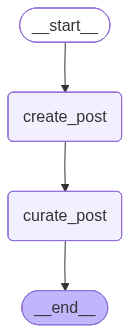

In [24]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(graph_schema)

graph.add_node("create_post", create_post)
graph.add_node("curate_post", curate_post)

graph.add_edge(START, "create_post")
graph.add_edge("create_post", "curate_post")
graph.add_edge("curate_post", END)

messages_graph = graph.compile()



from IPython.display import Image, display

# You could see the errors with the below command
Image(messages_graph.get_graph().draw_mermaid_png())

In [26]:
messages_graph.invoke(
    {"messages_manual": [HumanMessage(content="The importance of data privacy in the digital age")],
     "messages_auto": [HumanMessage(content="The importance of data privacy in the digital age")]}
)

{'messages_manual': [HumanMessage(content='The importance of data privacy in the digital age', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Data privacy in the digital age is about who gets to know what about you, and how that information is collected, stored, used, and shared. As our daily lives generate more data than ever—through smartphones, wearables, smart devices, online services, and AI systems—privacy becomes not just a personal preference but a foundational issue for autonomy, safety, and trust.\n\nWhy data privacy matters\n\n- Personal autonomy and dignity: Control over personal information preserves individual agency. When data about you is collected and analyzed without your meaningful consent, you lose the ability to shape your own life.\n- Security and safety: Data breaches, stolen credentials, and damaged reputations can lead to financial loss, identity theft, or harassment. Protecting data helps reduce these risks.\n- Fairness and non-discriminatio